<div style='background-color : orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align : center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#q1'>Question 1</a></li>
<li><a href='#q2'>Question 2</a></li>
<li><a href='#q3'>Question 3</a></li>
<li><a href='#misc'>Miscellaneous</a></li>

<div style='background-color : orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align : center'>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [104]:
# Vectorization and dataframing
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud

# Regex
import re

# NLP Prep
import unicodedata
import nltk

# Split
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# .py files
import acquire as a
import prepare as p

# env files
import env

In [9]:
# Set default plt style to 'bmh'
mpl.style.use('bmh')

<div style='background-color : orange'>
<a id='q1'></a>
    <b><u><i><h1 style='text-align : center'>
        Question 1
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 1.</b> Spam Data

- Load the spam data set.
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [12]:
# Acquire spam data
query = 'SELECT * FROM  spam'
url = env.get_db_url('spam_db')
spam = pd.read_sql(query, url)
spam.sample()

,id,label,text
2172,2172,ham,Yavnt tried yet and never played original either


In [16]:
# Create a cleaned text column as 'text_cleaned'
spam['text_cleaned'] = p.full_clean(spam.text)
spam.sample()

,id,label,text,text_cleaned
1980,1980,ham,"Sorry, I'll call later",sorry ill call later


In [21]:
# Split data into train, val, test
train_validate, test = train_test_split(spam,
                                       random_state=1349,
                                       train_size=0.9,
                                       stratify=spam.label)
train, validate = train_test_split(train_validate,
                                  random_state=1349,
                                  train_size=0.778,
                                  stratify=train_validate.label)
train.shape, validate.shape, test.shape

((3900, 4), (1114, 4), (558, 4))

In [53]:
# Split into groups
ham_words = ' '.join(train[train.label == 'ham']['text_cleaned'])
spam_words = ' '.join(train[train.label == 'spam']['text_cleaned'])
all_words = ' '.join(train.text_cleaned)
len(ham_words), len(spam_words), len(all_words)

(157636, 55850, 213487)

In [52]:
ham_words = []
for row in only_ham:
    ' '.join(new.append(row.split()))
ham_words

TypeError: can only join an iterable

In [54]:
# Create frequencies for each word group
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [57]:
# Create dataframe with all word frequencies
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
               .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int)))
word_counts.head()

,all,ham,spam
0089my,1,0,1
01223585236,1,0,1
01223585334,1,0,1
0125698789,1,1,0
020603,4,0,4


In [59]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,ham,spam
u,872,748,124
call,416,159,257
2,344,219,125
im,331,323,8
get,275,220,55
ur,260,164,96
go,217,194,23
dont,211,196,15
ok,206,205,1
free,189,40,149


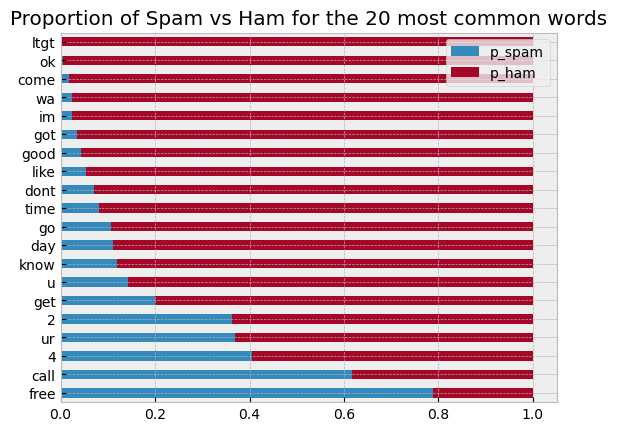

In [61]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')
plt.show()

<AxesSubplot:>

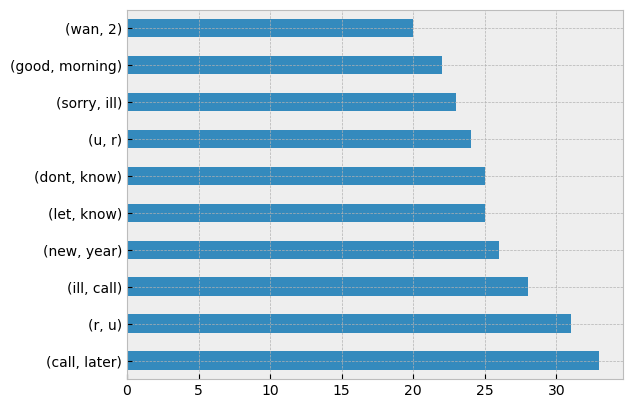

In [76]:
# Check combinations of ham_words
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()

<AxesSubplot:>

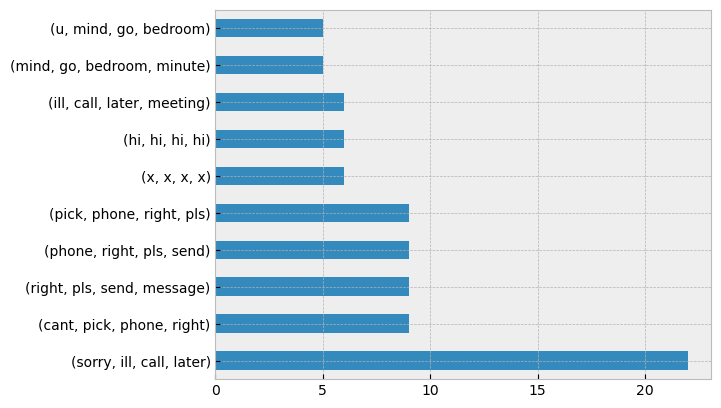

In [79]:
# Making other types of ngrams
pd.Series(nltk.ngrams(ham_words.split(), 4)).value_counts().head(10).plot.barh()

In [91]:
# Wordcloud (Expects a single string of words)
img = WordCloud(background_color='White').generate(' '.join(ham_words.split()))

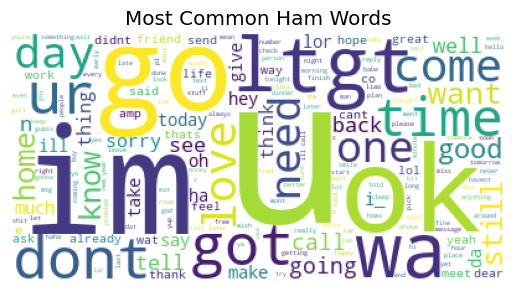

In [96]:
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

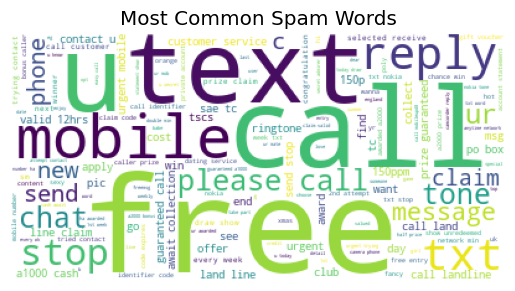

In [97]:
img = WordCloud(background_color='White').generate(' '.join(spam_words.split()))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Spam Words')
plt.show()

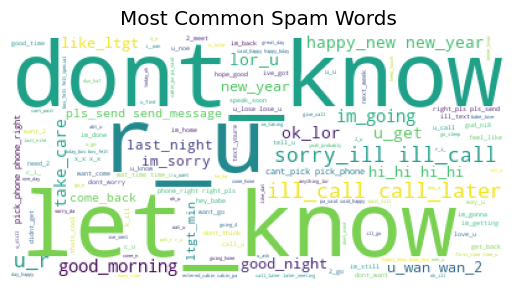

In [101]:
# bigram stuff
bihamgrams = pd.Series(nltk.bigrams(ham_words.split()))
onebihamgrams = [thing[0] + '_' + thing[1] for thing in bihamgrams]
img = WordCloud(background_color='White').generate(' '.join(onebihamgrams))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Spam Words')
plt.show()

In [ ]:
# Sentiment analysis
nltk.sentiment.SentimentAnalyzer

<div style='background-color : orange'>
<a id='q2'></a>
    <b><u><i><h1 style='text-align : center'>
        Question 2
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 2.</b> Explore the blog articles using the techniques discussed in the exploration lesson.

<div style='background-color : orange'>
<a id='q3'></a>
    <b><u><i><h1 style='text-align : center'>
        Question 3
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 3.</b> Explore the news articles using the techniques discussed in the exploration lesson. Use the <mark>category</mark> variable when exploring.

<div style='background-color : orange'>
<a id='misc'></a>
    <b><u><i><h1 style='text-align : center'>
        Miscellaneous
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>